In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,cross_val_predict
from sklearn.metrics import explained_variance_score,mean_squared_error,r2_score,mean_absolute_error,max_error
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Read data from files into data frame

In [69]:
test_dataset = pd.read_csv("../datasets/test.csv")
train_dataset = pd.read_csv("../datasets/train.csv")

In [70]:
test_dataset.head()
test_dataset.info()
test_dataset.shape

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

(878, 80)

In [71]:
train_dataset.head()
train_dataset.info()
train_dataset.shape

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

(2051, 81)

In [72]:
train_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


### Identify columns with missing values. Create a list of columns that have more than 95% missing value cells

In [73]:
#Iterate over DF to check if there are any columns with missing values. Drop columns with certain threshold
## and if those columns do not affect the model
dropcolumns = []
x = train_dataset.isnull().sum()
for k,v in x.iteritems():
    if v > 1500:
        dropcolumns.append(k)
print(f"Training dataset columns with missing values \n {dropcolumns}")
dropcolumns.clear()

y = test_dataset.isnull().sum()
for k,v in x.iteritems():
    if v > 1500:
        dropcolumns.append(k)
print(f"\nTest dataset columns with missing values \n {dropcolumns}")

#train_dataset.drop(columns = dropcolumns, inplace = True)
#test_dataset.drop(columns = dropcolumns, inplace = True)

#train_dataset.shape
#test_dataset.shape

Training dataset columns with missing values 
 ['Alley', 'Pool QC', 'Fence', 'Misc Feature']

Test dataset columns with missing values 
 ['Alley', 'Pool QC', 'Fence', 'Misc Feature']


### Drop columns in both train and test data set

In [74]:
correlation = train_dataset.corr()
correlation['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650270
Garage Cars        0.648220
Total Bsmt SF      0.628925
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.533922
Mas Vnr Area       0.512230
TotRms AbvGrd      0.504014
Fireplaces         0.471093
BsmtFin SF 1       0.423519
Lot Frontage       0.341842
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Area           0.296566
Bsmt Full Bath     0.283662
Half Bath          0.283001
2nd Flr SF         0.248452
Bsmt Unf SF        0.190210
Bedroom AbvGr      0.137067
Screen Porch       0.134581
3Ssn Porch         0.048732
Mo Sold            0.032735
Pool Area          0.023106
BsmtFin SF 2       0.016255
Misc Val          -0.007375
Yr Sold           -0.015203
Low Qual Fin SF   -0.041594
Bsmt Half Bath    -0.045328
Id                -0.051398
MS SubClass       -0.087335
Overall Cond      -0

In [75]:
othercols_todrop = ['PID','MS SubClass','Misc Val','Enclosed Porch',
                    'Fireplace Qu','3Ssn Porch','BsmtFin SF 2']

train_dataset.drop(columns = othercols_todrop, inplace = True)
#Drop Id from train data set only we need Id in test data set for output csv
train_dataset.drop(columns = 'Id', inplace = True) 
test_dataset.drop(columns = othercols_todrop, inplace = True)

train_dataset.shape
test_dataset.shape

(2051, 73)

(878, 73)

### Correlation matrix in order of correlation wrt SalePrice

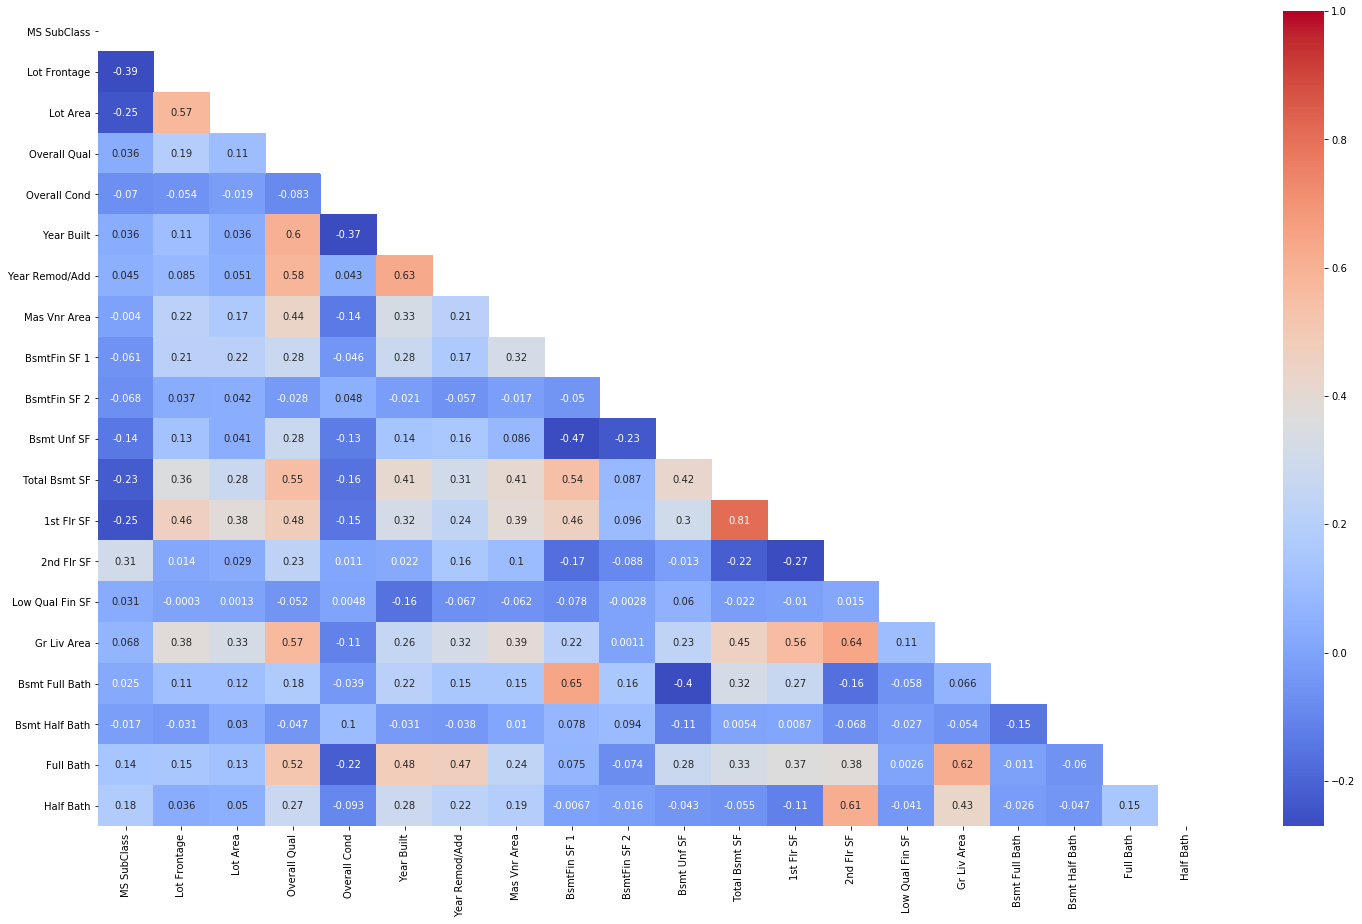

In [76]:
plt.figure(figsize=(25,15))
cor = correlation.iloc[2:22,2:22]
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cor,mask = mask,annot=True,cmap='coolwarm', robust = True);

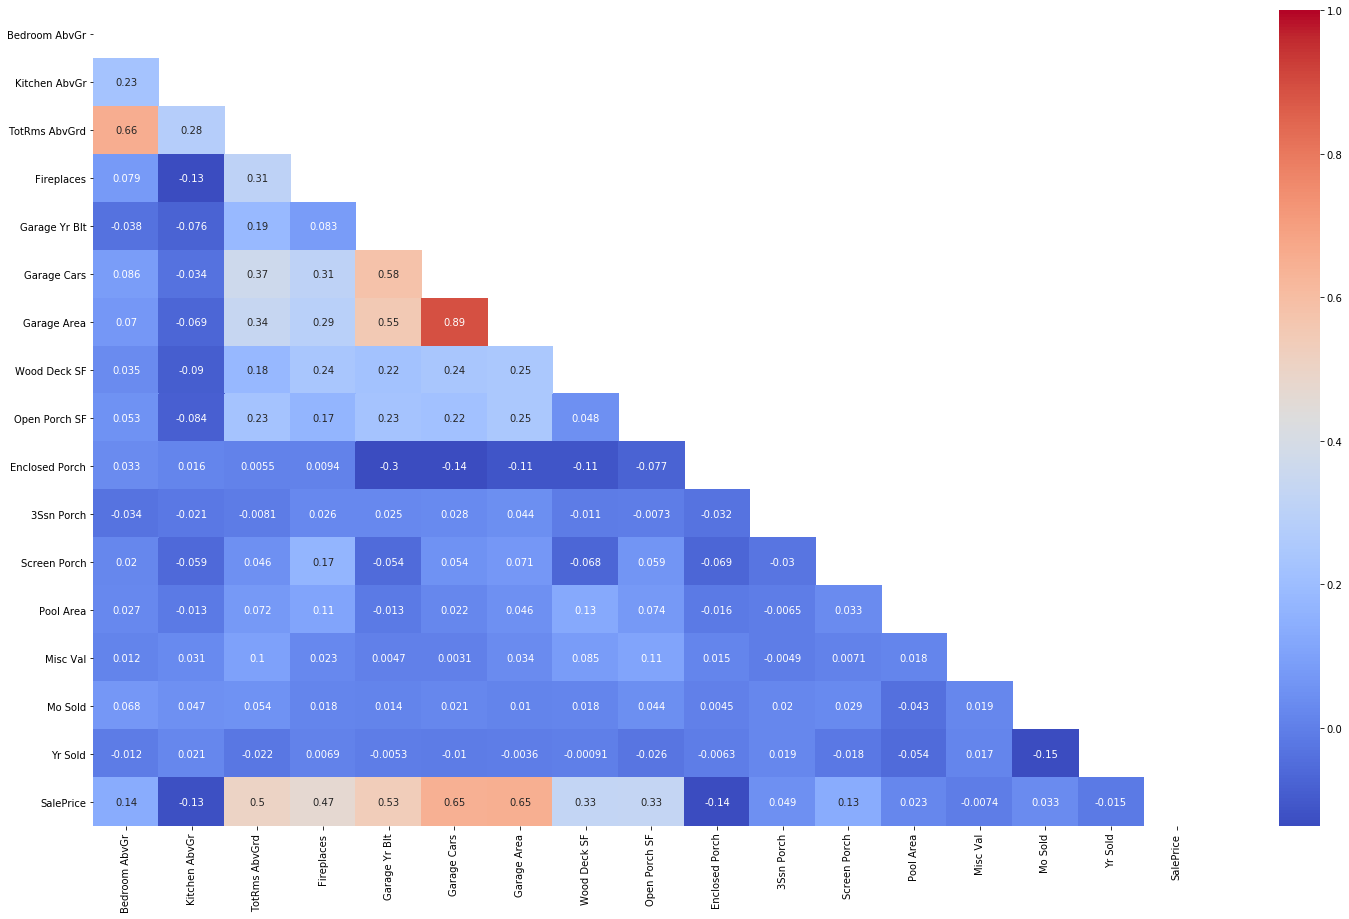

In [77]:
plt.figure(figsize=(25,15))
cor = correlation.iloc[22:44,22:44]
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cor,mask = mask,annot=True,cmap='coolwarm', robust = True);

#### SalePrice vs Square footage visualization
There are two notable ouliers in the dataset & remove them

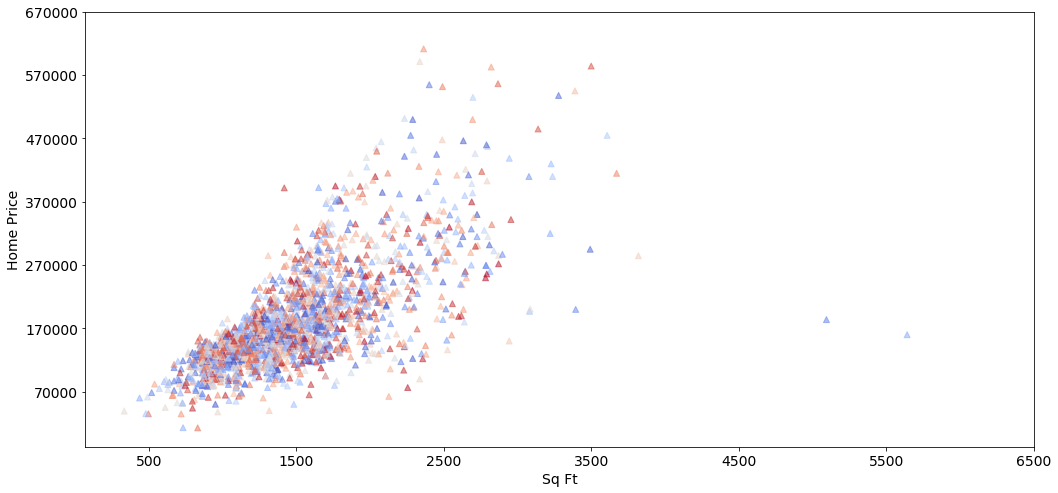

In [78]:
rng = np.random.RandomState(0)
colors = rng.rand(len(train_dataset))

plt.figure(figsize=(17,8))
plt.scatter(train_dataset["Gr Liv Area"],train_dataset['SalePrice'], cmap = 'coolwarm', 
            marker = '^', alpha = 0.5, c = colors)
plt.ylabel('Home Price',{'fontsize' : 14})
plt.yticks(np.arange(70_000,720_000,100_000),fontsize = 14)
plt.xlabel('Sq Ft',{'fontsize' : 14})
plt.xticks(np.arange(500,7000,1000),fontsize = 14);

In [79]:
train_dataset[train_dataset['Gr Liv Area'] > 5500]
train_dataset.drop(960,inplace= True)
#train_dataset.drop(1885,inplace= True)
train_dataset[train_dataset['Gr Liv Area'] > 5500]

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Open Porch SF,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Mo Sold,Yr Sold,Sale Type,SalePrice
960,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,...,292,0,480,Gd,NaN,NaN,1,2008,New,160000


,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Open Porch SF,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Mo Sold,Yr Sold,Sale Type,SalePrice


### Feature engineering. Conversion of ordinal column values to numeric. 

In [80]:
dataframes = ['test_dataset','train_dataset']

def transform_cols(columnname,dataframe):

#Transform columns that use ordinal quality values into numeric
#Columns values and the mapping to be used   'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1, 'NaN':0
    numeric_values = {'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1}
    
    dataframe[columnname] = dataframe[columnname].map(numeric_values)
    # replace missing values with 0
    dataframe[columnname].fillna(value=0, inplace = True)
    
transform_cols('Exter Qual',test_dataset)
transform_cols('Exter Cond',test_dataset)
transform_cols('Bsmt Qual',test_dataset)
transform_cols('Bsmt Cond',test_dataset)
transform_cols('Heating QC',test_dataset)
transform_cols('Kitchen Qual',test_dataset)
transform_cols('Garage Qual',test_dataset)
transform_cols('Garage Cond',test_dataset)

transform_cols('Exter Qual',train_dataset)
transform_cols('Exter Cond',train_dataset)
transform_cols('Bsmt Qual',train_dataset)
transform_cols('Bsmt Cond',train_dataset)
transform_cols('Heating QC',train_dataset)
transform_cols('Kitchen Qual',train_dataset)
transform_cols('Garage Qual',train_dataset)
transform_cols('Garage Cond',train_dataset)

In [81]:
train_dataset['HouseAge'] =  train_dataset['Yr Sold'] - train_dataset['Year Built']
test_dataset['HouseAge'] =  test_dataset['Yr Sold'] - test_dataset['Year Built']

In [82]:
train_dataset['Central Air'] = train_dataset['Central Air'].apply(lambda x: 1 if x is 'Y' else 0)
test_dataset['Central Air'] = test_dataset['Central Air'].apply(lambda x: 1 if x is 'Y' else 0)

In [83]:
train_dataset['Total Bath'] = train_dataset['Full Bath'] + train_dataset['Half Bath']
train_dataset['Bsmt Total Bath'] = train_dataset['Bsmt Full Bath'] + train_dataset['Bsmt Half Bath']

In [84]:
test_dataset['Total Bath'] = test_dataset['Full Bath'] + test_dataset['Half Bath']
test_dataset['Bsmt Total Bath'] = test_dataset['Bsmt Full Bath'] + test_dataset['Bsmt Half Bath']

In [85]:
#This had no affect on overall model score.
#train_dataset = pd.get_dummies(train_dataset, columns = ['Garage Type'], drop_first = True)
#test_dataset = pd.get_dummies(test_dataset, columns = ['Garage Type'], drop_first = True)

In [86]:
#Set Gr Liv Area to sum of 1st Flr & 2nd Flr sq ft
train_mask = (train_dataset['1st Flr SF'] + train_dataset['2nd Flr SF'] ) != (train_dataset['Gr Liv Area'])

temp_d_f = train_dataset[train_mask]
temp_d_f
for i in range(0,len(temp_d_f)):    
    a = train_dataset.loc[temp_d_f.index[i],'1st Flr SF'] 
    b = train_dataset.loc[temp_d_f.index[i],'2nd Flr SF']
    train_dataset.loc[temp_d_f.index[i],'Gr Liv Area'] = a + b

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,...,Pool QC,Fence,Misc Feature,Mo Sold,Yr Sold,Sale Type,SalePrice,HouseAge,Total Bath,Bsmt Total Bath
249,RM,64.0,11067,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,...,NaN,NaN,NaN,3,2007,WD,68104,68,1,0.0
269,FV,30.0,3180,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,NaN,4,2006,WD,144152,1,3,0.0
320,RM,NaN,12358,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,NaN,5,2007,WD,128500,66,2,0.0
356,C (all),105.0,8470,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,NaN,MnPrv,NaN,10,2009,ConLD,85000,94,1,0.0
382,RM,92.0,5520,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,...,NaN,MnPrv,NaN,7,2009,WD,104000,97,1,0.0
497,RL,51.0,10480,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,NaN,3,2008,WD,115000,72,1,0.0
705,RM,63.0,11426,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,NaN,6,2008,WD,118000,98,2,0.0
828,RL,60.0,10410,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,...,NaN,NaN,NaN,6,2009,WD,142900,94,2,0.0
858,RH,60.0,10896,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,...,NaN,NaN,NaN,3,2007,WD,200000,93,2,0.0
918,RM,98.0,8820,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,...,NaN,MnWw,NaN,9,2009,WD,124900,119,1,0.0


In [87]:
test_mask = (test_dataset['1st Flr SF'] + test_dataset['2nd Flr SF'] ) != (test_dataset['Gr Liv Area'])

temp_df = test_dataset[test_mask]
temp_df
for i in range(0,len(temp_df)):    
    a = test_dataset.loc[temp_df.index[i],'1st Flr SF'] 
    b = test_dataset.loc[temp_df.index[i],'2nd Flr SF']
    test_dataset.loc[temp_df.index[i],'Gr Liv Area'] = a + b

,Id,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Mo Sold,Yr Sold,Sale Type,HouseAge,Total Bath,Bsmt Total Bath
31,756,RM,52.0,6240,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,1,2009,WD,84,1,0
89,687,RL,60.0,8064,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,8,2009,COD,61,1,0
124,2843,RL,60.0,6204,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,3,2006,WD,94,1,1
173,2509,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,7,2006,WD,1,3,0
234,2571,RL,174.0,25419,Pave,NaN,Reg,Lvl,AllPub,Corner,...,512,Ex,GdPrv,NaN,3,2006,WD,88,2,2
342,676,RL,60.0,12144,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,Othr,9,2009,WD,60,1,0
534,1518,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,7,2008,WD,69,3,0


### Split train & test data set into two each based on  numeric and non-numeric column data types


In [88]:
quantitative_df = train_dataset.select_dtypes(exclude = 'object')
qualitative_df  = train_dataset.select_dtypes(include = 'object')

quantitative_testdf = test_dataset.select_dtypes(exclude = 'object')
qualitative_testdf  = test_dataset.select_dtypes(include = 'object')

quantitative_df.shape
qualitative_df.shape

quantitative_testdf.shape
qualitative_testdf.shape

(2050, 44)

(2050, 32)

(878, 44)

(878, 32)

In [89]:
quantitative_df.head()
quantitative_testdf.head()
#We don't need this in copy of test data set since I removed it from copy of train data set
quantitative_testdf.drop(columns = 'Id', inplace = True)

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,Bsmt Qual,...,Wood Deck SF,Open Porch SF,Screen Porch,Pool Area,Mo Sold,Yr Sold,SalePrice,HouseAge,Total Bath,Bsmt Total Bath
0,NaN,13517,6,8,1976,2005,289.0,4,3,3.0,...,0,44,0,0,3,2010,130500,34,3,0.0
1,43.0,11492,7,5,1996,1997,132.0,4,3,4.0,...,0,74,0,0,4,2009,220000,13,3,1.0
2,68.0,7922,5,7,1953,2007,0.0,3,4,3.0,...,0,52,0,0,1,2010,109000,57,1,1.0
3,73.0,9802,5,5,2006,2007,0.0,3,3,4.0,...,100,0,0,0,4,2010,174000,4,3,0.0
4,82.0,14235,6,8,1900,1993,0.0,3,3,2.0,...,0,59,0,0,3,2010,138500,110,2,0.0


,Id,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,...,Garage Cond,Wood Deck SF,Open Porch SF,Screen Porch,Pool Area,Mo Sold,Yr Sold,HouseAge,Total Bath,Bsmt Total Bath
0,2658,69.0,9142,6,8,1910,1950,0.0,3,2,...,1.0,0,60,0,0,4,2006,96,2,0
1,2718,NaN,9662,5,4,1977,1977,0.0,3,3,...,3.0,170,0,0,0,8,2006,29,2,0
2,2414,58.0,17104,7,5,2006,2006,0.0,4,3,...,3.0,100,24,0,0,9,2006,0,3,1
3,1989,60.0,8520,5,6,1923,2006,0.0,4,3,...,3.0,0,0,0,0,7,2007,84,1,0
4,625,NaN,9500,6,5,1963,1963,247.0,3,3,...,3.0,0,76,185,0,7,2009,46,2,1


/Users/rahul/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [90]:
quantitative_df['SalePrice'].max()
logprice = np.log1p(quantitative_df['SalePrice'])
quantitative_df['SalePrice'] = logprice
quantitative_df['SalePrice'].max()

611657

/Users/rahul/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


13.323928581764989

### Missing value check 

In [96]:
#Replace missing values
quantitative_df['Mas Vnr Area'].fillna(method = 'backfill', inplace = True)
quantitative_df['Bsmt Full Bath'].fillna(0.0 , inplace = True)
quantitative_df['Bsmt Half Bath'].fillna(0.0, inplace = True)
quantitative_df['Garage Yr Blt'].fillna(quantitative_df['Garage Yr Blt'].median(), inplace = True)
quantitative_df['Garage Cars'].fillna(quantitative_df['Garage Cars'].median(), inplace = True)
quantitative_df['Garage Area'].fillna(quantitative_df['Garage Area'].median(), inplace = True)
quantitative_df['Lot Frontage'].fillna(quantitative_df['Lot Frontage'].median(), inplace = True)
quantitative_df['BsmtFin SF 1'].fillna(quantitative_df['BsmtFin SF 1'].median(), inplace = True)
quantitative_df['Bsmt Total Bath'].fillna(0.0, inplace = True)
quantitative_df['Bsmt Unf SF'].fillna(quantitative_df['Bsmt Unf SF'].median(), inplace = True)
quantitative_df['Total Bsmt SF'].fillna(quantitative_df['Bsmt Unf SF'].median(), inplace = True)


#Missing values in test data
quantitative_testdf['Mas Vnr Area'].fillna(method = 'backfill', inplace = True)
quantitative_testdf['Garage Yr Blt'].fillna(quantitative_testdf['Garage Yr Blt'].median(), inplace = True)
quantitative_testdf['Lot Frontage'].fillna(quantitative_testdf['Lot Frontage'].median(), inplace = True)
quantitative_testdf['BsmtFin SF 1'].fillna(quantitative_testdf['BsmtFin SF 1'].median(), inplace = True)
quantitative_testdf['Bsmt Total Bath'].fillna(0.0, inplace = True)
quantitative_testdf['Bsmt Unf SF'].fillna(quantitative_testdf['Bsmt Unf SF'].median(), inplace = True)
quantitative_testdf['Total Bsmt SF'].fillna(quantitative_testdf['Bsmt Unf SF'].median(), inplace = True)

In [97]:
#Check one more time for any columns with missing cells

dropcolumns = []
x = quantitative_df.isnull().any()
for k,v in x.iteritems():
    if v is True:
        dropcolumns.append(k)
        
print(f"Training dataset columns with missing values \n {dropcolumns}")
dropcolumns.clear()

y = qualitative_testdf.isnull().any()
for k,v in x.iteritems():
    if v is True:
        dropcolumns.append(k)
        
print(f"\nTest dataset columns with missing values \n {dropcolumns}")

Training dataset columns with missing values 
 []

Test dataset columns with missing values 
 []


### Check shape and columns before creating a model

In [98]:
len(quantitative_df.columns)
len(quantitative_testdf.columns)

quantitative_df.columns
quantitative_testdf.columns

44

43

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin SF 1', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating QC', 'Central Air', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Wood Deck SF', 'Open Porch SF', 'Screen Porch',
       'Pool Area', 'Mo Sold', 'Yr Sold', 'SalePrice', 'HouseAge',
       'Total Bath', 'Bsmt Total Bath'],
      dtype='object')

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin SF 1', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating QC', 'Central Air', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Wood Deck SF', 'Open Porch SF', 'Screen Porch',
       'Pool Area', 'Mo Sold', 'Yr Sold', 'HouseAge', 'Total Bath',
       'Bsmt Total Bath'],
      dtype='object')

### Linear regression

In [99]:
y = quantitative_df['SalePrice']
X = quantitative_df #assign to X & then drop SalesPrice 
X = X.drop(columns = 'SalePrice')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, train_size = 0.70, random_state = 42)

In [100]:
X_train.shape
X_test.shape
y_test.shape
y_train.shape

(1435, 43)

(615, 43)

(615,)

(1435,)

In [101]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
linear_reg.intercept_
#linear_reg.coef_

dummy_prediction = linear_reg.predict(X_test)# This is just for kicks to plot it
saleprice_pred = linear_reg.predict(quantitative_testdf) #Actual test data

#
dummy_prediction.shape
dummy_prediction = np.expm1(dummy_prediction)
#######

saleprice_pred.shape
saleprice_pred = np.expm1(saleprice_pred)

18.04996574470501

(615,)

(878,)

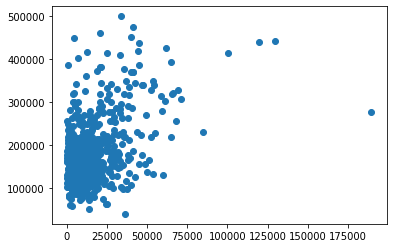

In [106]:
train_resids = abs(y_test - dummy_prediction)
plt.scatter(train_resids,y_test)

### Model metrics

In [33]:
print(f"R2 score training data {linear_reg.score(X_train,y_train)} \n"
     f"R2 score test data {linear_reg.score(X_test,y_test)} \n\n")

R2 score training data 0.8829015359531932 
R2 score test data 0.9053260217114202 




In [105]:
#transform back to normal values since we log transformed it above
y_test = np.expm1(y_test)
y_train = np.expm1(y_train)

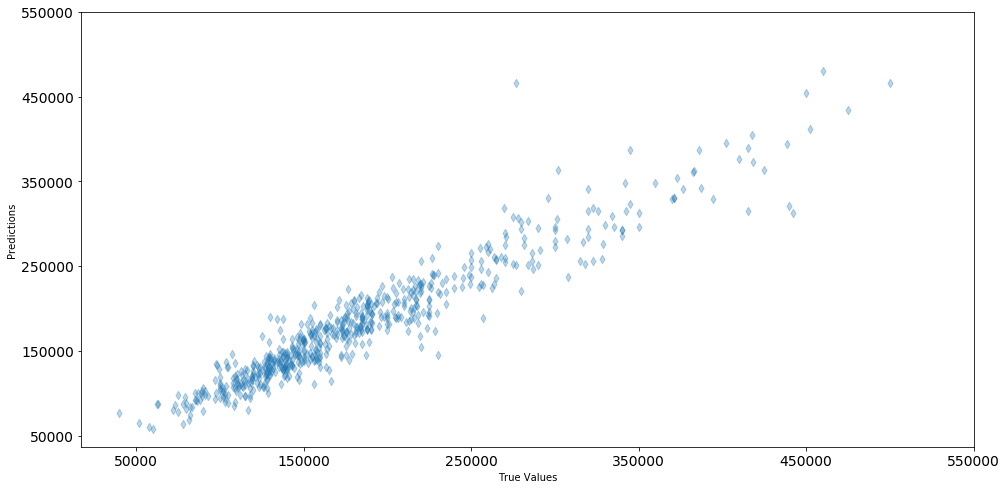

In [35]:
#plot actual vs predicted
plt.figure(figsize=(16,8))
plt.style.context(style = 'bmh',after_reset = True)

plt.scatter(x = y_test, y = dummy_prediction,
           cmap = 'gnuplot',alpha = 0.3, marker = 'd')

plt.xlabel("True Values");
plt.ylabel("Predictions");
plt.xticks(np.arange(50_000,580_000,100_000),fontsize = 14);
plt.yticks(np.arange(50_000,580_000,100_000),fontsize = 14);

plt.show;

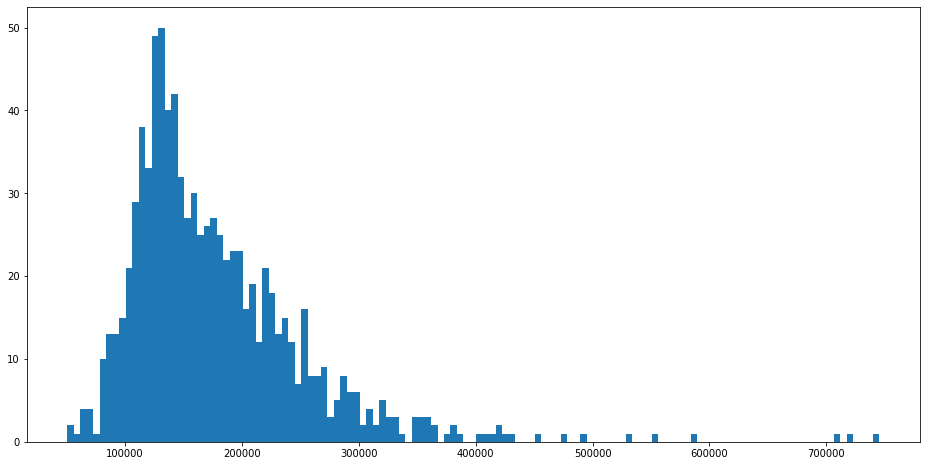

In [36]:
plt.figure(figsize=(16,8))
plt.hist(x = saleprice_pred,bins = 125);

In [37]:
print(f"Cross Validation scores {cross_val_score(linear_reg, X_train, y_train)}")
print(f"Cross Validation score mean {cross_val_score(linear_reg, X_train, y_train).mean()}")
print(f"Cross Validation sdeviation {cross_val_score(linear_reg, X_train, y_train).std()}")

Cross Validation scores [0.86930288 0.86402334 0.88539351 0.75534382 0.83979641]
Cross Validation score mean 0.842771993181495
Cross Validation sdeviation 0.04609694460874034


In [38]:
cross_validate(linear_reg,X_train, y_train ,return_train_score = True)

{'fit_time': array([0.0039444 , 0.00288224, 0.002285  , 0.00271702, 0.00295091]),
 'score_time': array([0.00116682, 0.00142384, 0.00115108, 0.00093102, 0.00109911]),
 'test_score': array([0.86930288, 0.86402334, 0.88539351, 0.75534382, 0.83979641]),
 'train_score': array([0.85112867, 0.85422665, 0.84878258, 0.88369607, 0.85845655])}

In [39]:
cross_validate(linear_reg,X_test, y_test ,return_train_score = True)

{'fit_time': array([0.0037508 , 0.00280976, 0.00183725, 0.00246406, 0.00203323]),
 'score_time': array([0.00113511, 0.00119233, 0.00085592, 0.000916  , 0.00123882]),
 'test_score': array([0.8848303 , 0.89710363, 0.87351741, 0.89787553, 0.87704695]),
 'train_score': array([0.91159879, 0.9123234 , 0.91510722, 0.91156907, 0.91429405])}

In [44]:
c_vp = cross_val_predict(linear_reg,X_train,y_train)
c_vp.shape
c_vp.mean()
c_vp.std()

(1435,)

180190.803377248

74743.91600047151

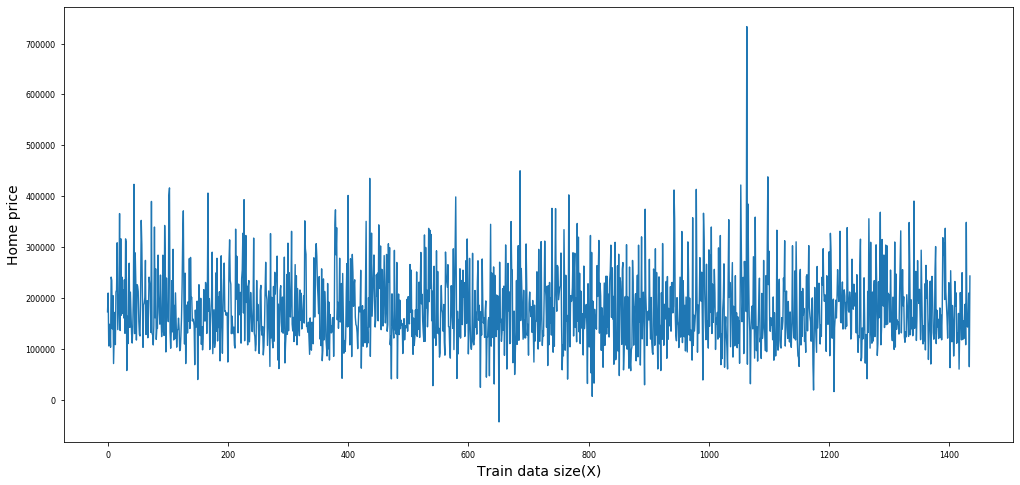

In [43]:
c_vp = cross_val_predict(linear_reg,X_train,y_train)


plt.figure(figsize=(17,8))
plt.style.use('seaborn-paper')
plt.xlabel("Train data size(X)", fontsize = 14)
plt.ylabel('Home price', fontsize = 14)
plt.plot(c_vp); 

In [45]:
c_vp1 = cross_val_predict(linear_reg,X_test,y_test)
c_vp1.shape
c_vp1.mean()
c_vp1.std()

(615,)

185395.18414242516

74200.81197617379

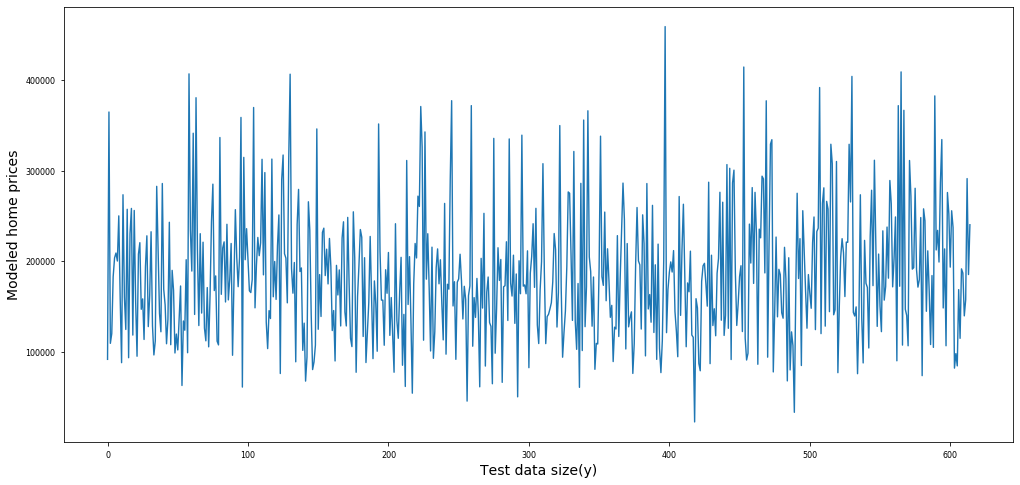

In [47]:
c_vp1 = cross_val_predict(linear_reg,X_test,y_test)

plt.figure(figsize=(17,8))
plt.style.use('seaborn-paper')
plt.xlabel("Test data size(y)", fontsize = 14)
plt.ylabel('Modeled home prices', fontsize = 14)
plt.plot(c_vp1); 

In [144]:
import statsmodels.api as sm

smX = sm.add_constant(X,has_constant= 'add')
smX.head()
smX.var()

,const,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Exter Cond,...,Garage Cond,Wood Deck SF,Open Porch SF,Screen Porch,Pool Area,Mo Sold,Yr Sold,HouseAge,Total Bath,Bsmt Total Bath
0,1.0,68.0,13517,6,8,1976,2005,289.0,4,3,...,3.0,0,44,0,0,3,2010,34,3,0.0
1,1.0,43.0,11492,7,5,1996,1997,132.0,4,3,...,3.0,0,74,0,0,4,2009,13,3,1.0
2,1.0,68.0,7922,5,7,1953,2007,0.0,3,4,...,3.0,0,52,0,0,1,2010,57,1,1.0
3,1.0,73.0,9802,5,5,2006,2007,0.0,3,3,...,3.0,100,0,0,0,4,2010,4,3,0.0
4,1.0,82.0,14235,6,8,1900,1993,0.0,3,3,...,3.0,0,59,0,0,3,2010,110,2,0.0


const              0.000000e+00
Lot Frontage       4.252353e+02
Lot Area           4.406890e+07
Overall Qual       2.027860e+00
Overall Cond       1.220355e+00
Year Built         9.105064e+02
Year Remod/Add     4.424630e+02
Mas Vnr Area       3.061742e+04
Exter Qual         3.446271e-01
Exter Cond         1.390384e-01
Bsmt Qual          8.122323e-01
Bsmt Cond          3.273518e-01
BsmtFin SF 1       1.995000e+05
Bsmt Unf SF        1.979839e+05
Total Bsmt SF      1.896721e+05
Heating QC         9.296204e-01
Central Air        6.408099e-02
1st Flr SF         1.511710e+05
2nd Flr SF         1.810962e+05
Low Qual Fin SF    2.609287e+03
Gr Liv Area        2.393431e+05
Bsmt Full Bath     2.720242e-01
Bsmt Half Bath     6.332655e-02
Full Bath          3.017679e-01
Half Bath          2.509731e-01
Bedroom AbvGr      6.836194e-01
Kitchen AbvGr      4.403243e-02
Kitchen Qual       4.421357e-01
TotRms AbvGrd      2.420373e+00
Fireplaces         4.050683e-01
Garage Yr Blt      6.112251e+02
Garage C

In [145]:
sml = sm.OLS(y,smX).fit()
sml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     419.5
Date:                Sat, 11 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:51:53   Log-Likelihood:                 1180.4
No. Observations:                2050   AIC:                            -2281.
Df Residuals:                    2010   BIC:                            -2056.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              18.1760      4.776      3.805      0.000       8.809      27.543
Lot Frontage        0.0012      0.000      6.655      0.000       0.001       0.002
Lot Area         3.509e-06   5.29e-07      6.631      0.000    2.47e-06    4.55e-06
Overall Qual        0.0754      0.004     17.905      0.000       0.067       0.084
Overall Cond        0.0446      0.004     11.676      0.000       0.037       0.052
Year Built         -0.0009      0.001     -1.152      0.250      -0.003       0.001
Year Remod/Add      0.0004      0.000      1.496      0.135      -0.000       0.001
Mas Vnr Area    -1.564e-05   2.08e-05     -0.754      0.451   -5.63e-05    2.51e-05
Exter Qual          0.0300      0.009      3.183      0.001       0.012       0.049
Exter Cond          0.0167      0.009      1.817      0.069      -0.001       0.035
Bsmt Qual           0.0242      0.007      3.447      0.001       0.010       0.038
Bsmt Cond          -0.0061      0.008     -0.730      0.466      -0.022       0.010
BsmtFin SF 1      3.63e-05   1.99e-05      1.828      0.068   -2.65e-06    7.52e-05
Bsmt Unf SF     -3.078e-05   2.03e-05     -1.513      0.130   -7.07e-05     9.1e-06
Total Bsmt SF       0.0001   2.49e-05      4.056      0.000    5.21e-05       0.000
Heating QC          0.0196      0.004      4.723      0.000       0.011       0.028
Central Air         0.0612      0.015      4.169      0.000       0.032       0.090
1st Flr SF        8.46e-05   1.16e-05      7.272      0.000    6.18e-05       0.000
2nd Flr SF       5.752e-05      1e-05      5.744      0.000    3.79e-05    7.72e-05
Low Qual Fin SF     0.0001   6.28e-05      1.942      0.052   -1.21e-06       0.000
Gr Liv Area         0.0001   1.09e-05     13.062      0.000       0.000       0.000
Bsmt Full Bath      0.0277      0.006      4.576      0.000       0.016       0.040
Bsmt Half Bath     -0.0194      0.008     -2.341      0.019      -0.036      -0.003
Full Bath           0.0148      0.006      2.546      0.011       0.003       0.026
Half Bath          -0.0078      0.006     -1.374      0.170      -0.019       0.003
Bedroom AbvGr       0.0093      0.006      1.633      0.103      -0.002       0.020
Kitchen AbvGr      -0.0344      0.018     -1.915      0.056      -0.070       0.001
Kitchen Qual        0.0310      0.008      4.131      0.000       0.016       0.046
TotRms AbvGrd       0.0047      0.004      1.151      0.250      -0.003       0.013
Fireplaces          0.0420      0.006      7.004      0.000       0.030       0.054
Garage Yr Blt       0.0006      0.000      2.412      0.016       0.000       0.001
Garage Cars         0.0200      0.010      1.968      0.049    7.46e-05       0.040
Garage Area      1.451e-05   3.57e-05      0.407      0.684   -5.54e-05    8.45e-05
Garage Qual        -0.0216      0.014     -1.554      0.120

In [146]:
submit_df = pd.DataFrame()
submit_df['Id'] = test_dataset['Id']

len(dummy_prediction)
submit_df['SalePrice'] = saleprice_pred
submit_df.head()
submit_df.info()

submit_df.to_csv('./datasets/output_1.csv',index = False)

615

,Id,SalePrice
0,2658,120388.050792
1,2718,161862.571178
2,2414,219426.708001
3,1989,109237.383455
4,625,176020.481205


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         878 non-null    int64  
 1   SalePrice  878 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 13.8 KB
